In [1]:
import django, sys, os
import pandas as pd
sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
sys.path.append('/home/max/software/django-tmv/tmv_mcc-apsis/BasicBrowser')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *

In [2]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('./jupyter-google-e4b72bf44320.json', scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '15RN38inB4aGedpzFaDw2y0p4L9ecqvo_2AW4Oea4whw'
wb = gc.open_by_key(spreadsheet_key)
ws = wb.worksheet("New Classification")

table = ws.get_all_values()
df = pd.DataFrame(table[1:], columns=table[0])
df.head()

,Level I,Level I description,Level II.i,Level II.i description,Level II.ii,Level III.ii,Level III,Definition,Examples,Definition link,Level ll,Level II description,
0,Economic instruments,Government spends money to provide mitigation ...,Carbon pricing,Goverment increases the cost of emitting throu...,Tax,,Tax,A compulsory payment to the government levied ...,,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,Incentives,Government sets economic incentives to promote...,
1,Economic instruments,Government spends money to provide mitigation ...,Carbon pricing,Goverment increases the cost of emitting throu...,Tax,,Border Carbon Adjustment,A mechanism which prices imported goods based ...,,,Incentives,Government sets economic incentives to promote...,
2,Economic instruments,Government spends money to provide mitigation ...,Subsidies,Government reduces costs or increases incentiv...,Incentives,,Subsidy/ compensation/ allowance,"Tax reductions, price support or the equivalen...","REDD+,",https://archive.ipcc.ch/publications_and_data/...,Incentives,Government sets economic incentives to promote...,
3,Economic instruments,Government spends money to provide mitigation ...,Subsidies,Government reduces costs or increases incentiv...,Incentives,,Feed in tariffs,Mechanism that allows providers of renewable e...,,https://www.google.com/url?sa=t&rct=j&q=&esrc=...,Incentives,Government sets economic incentives to promote...,
4,Economic instruments,Government spends money to provide mitigation ...,Carbon pricing,Goverment increases the cost of emitting throu...,Tax,,Emissions trading,Including baseline credit and cap and trade. ...,CDM,,Incentives,Government sets economic incentives to promote...,Involves the establishment of an overall targe...


In [3]:
aws = wb.worksheet("adaptation")
table = aws.get_all_values()
adf = pd.DataFrame(table[1:], columns=table[0])
adf.head()

,Level I,Level I description,Level II,Level II description,Level III,Level III description,Level IV,Level IV description
0,Treasure,Government spends money to provide mitigation ...,Incentives,Government reduces costs or increases financia...,Risk underwriting,The government gurantees a (partial) payment i...,,
1,Treasure,Government spends money to provide mitigation ...,Incentives,Government reduces costs or increases financia...,Grants,"Financing (part of) an adaptation project, usu...",,
2,Treasure,Government spends money to provide mitigation ...,Incentives,Government reduces costs or increases financia...,Subsidies,Reducing costs by providing partial payment or...,,
3,Treasure,Government spends money to provide mitigation ...,Taxation,Increasing or decreasing taxation rates to inc...,Corrective,Tax is increased to disincentivise risk-taking...,,
4,Treasure,Government spends money to provide mitigation ...,Taxation,Increasing or decreasing taxation rates to inc...,Deductions,Tax is decreased to incentivise an adaptation,,


In [4]:
treeData = [{"name": "Policy Instruments", "parent":None,"children":[]}]
for name, group in adf.groupby('Level I'):
    leaf = {
        "name": name,
        "parent": "Policy Instruments",
        "children": []
    } 
    for l2, group2 in group.groupby('Level II'):
        leaf2 = {
            "name": l2,
            "parent": name,
            "children": []
        }
        for l3, group3 in group2.groupby('Level III'):
            leaf3 = {"name":l3, "parent": l2, "children":None}
            leaf2['children'].append(leaf3)
        leaf['children'].append(leaf2)
    treeData[0]['children'].append(leaf)
import json
with open('typology/adaptation-tree.json', 'w') as fp:
    json.dump(treeData, fp)

In [5]:
django.db.connection.close()
p1 = Category.objects.get(pk=1150)
p1.show_equivalents = True
p1.save()
p2 = Category.objects.get(pk=1151)
p2.filtered_equivalents = True
p2.show_equivalents = True
p2.save()
p3 = Category.objects.get(pk=1152)
p3.filtered_equivalents = True
p3.save()

p = Project.objects.get(pk=260)

In [6]:
treeData = [{"name": "Policy Instruments", "parent":None,"children":[]}]
for name, group in df.groupby('Level I'):
    leaf = {
        "name": name,
        "parent": "Policy Instruments",
        "children": []
    } 
    for l2, group2 in group.groupby('Level II.i'):
        leaf2 = {
            "name": l2,
            "parent": name,
            "children": []
        }
        for l3, group3 in group2.groupby('Level III'):
            leaf3 = {"name":l3, "parent": l2, "children":None}
            leaf2['children'].append(leaf3)
        leaf['children'].append(leaf2)
    treeData[0]['children'].append(leaf)
import json
with open('typology/tree.json', 'w') as fp:
    json.dump(treeData, fp)

5 21 48


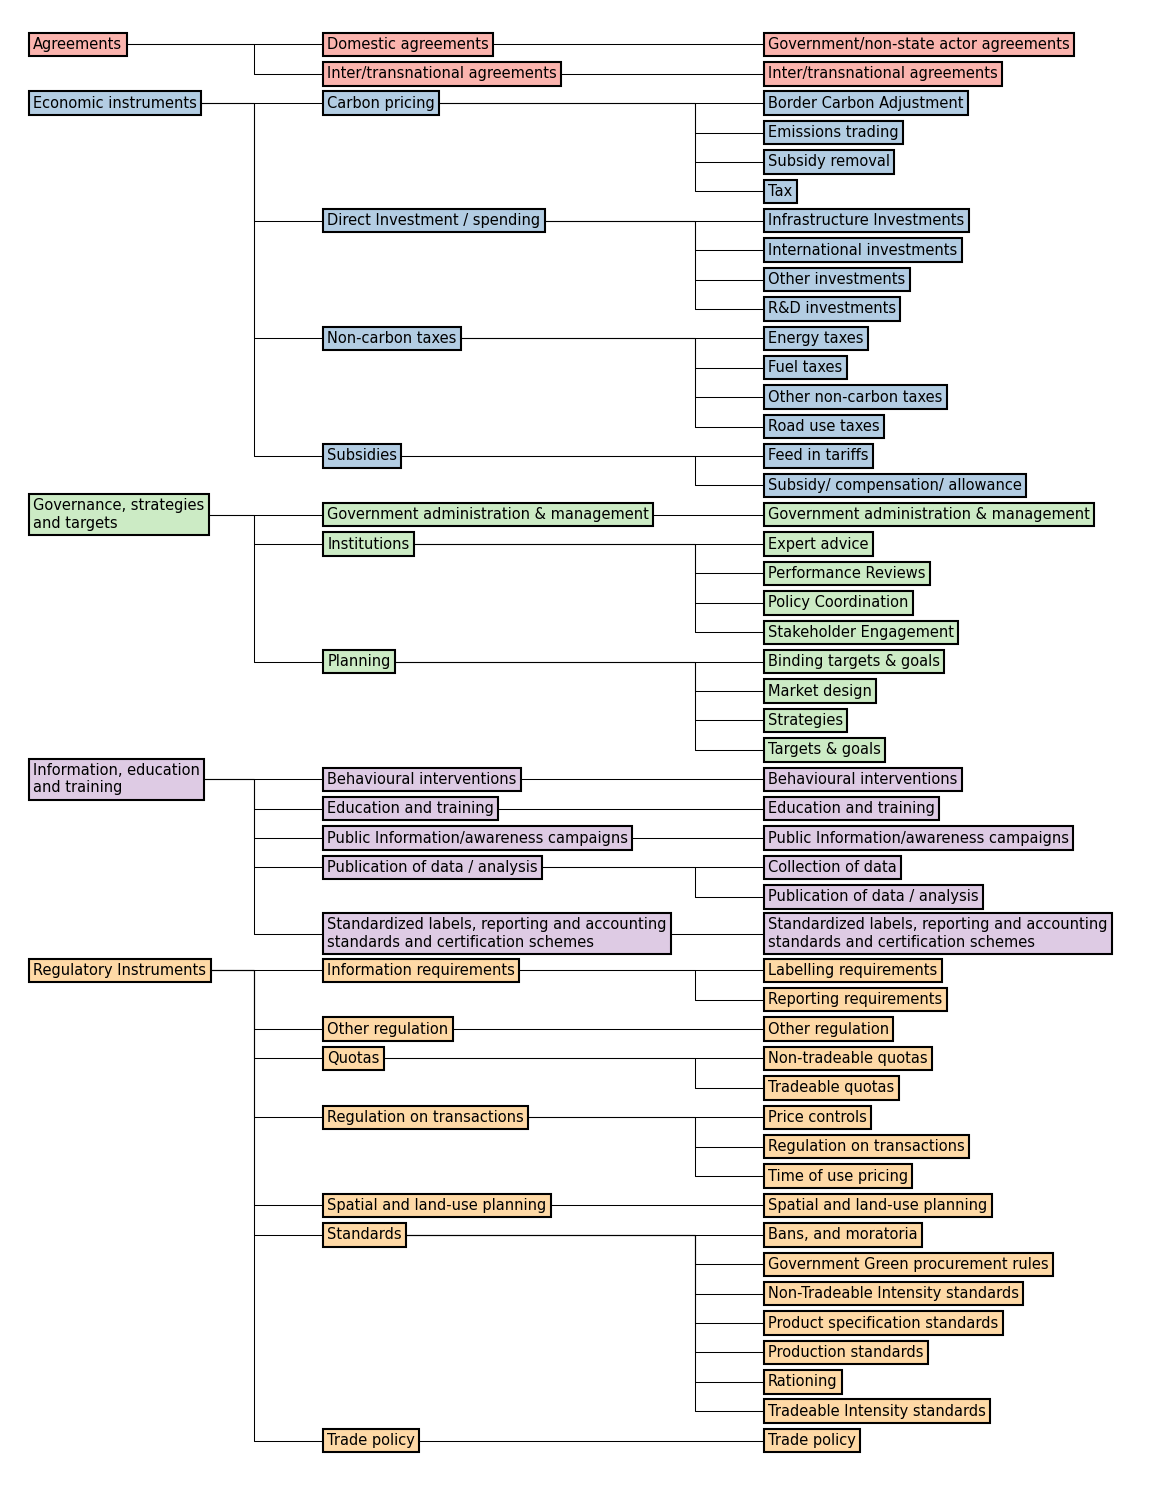

In [8]:
import matplotlib.pyplot as plt
from textwrap import wrap
fig, ax = plt.subplots(figsize=(8,10),dpi=150)
w = 5
h = 5
y = h
ha="left"
fs=7
va="center"
def twrap(t,line_length=45):
    return "\n".join(wrap(t,width=line_length))

alpha = 1

colors = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6']

nl1 = 0
nl2 = 0
nl3 = 0

for i,l in enumerate(treeData[0]['children']):
    for j,ll in enumerate(l['children']):
        for k,lll in enumerate(ll['children']):
            if len(lll['name'])>80:
                y+=h*0.25
            ax.text(w*3,y,twrap(lll['name']),ha=ha, fontsize=fs, wrap=True,va=va, bbox={'facecolor': colors[i], 'alpha': alpha , 'pad': 2})
            nl3+=1
            if j==0 and k==0:
                ax.text(w*1,y,twrap(l['name'],25),ha=ha, fontsize=fs, wrap=True,va=va, bbox={'facecolor': colors[i], 'alpha': alpha, 'pad': 2})
                nl1+=1
                y1 = y
            if k==0:
                ax.text(w*1.8,y,twrap(ll['name']),ha=ha, fontsize=fs, wrap=True,va=va, bbox={'facecolor': colors[i], 'alpha': alpha, 'pad': 2})
                nl2+=1
                ax.plot([w*1,w*1.6,w*1.6,w*1.8],[y1,y1,y,y],color="black",lw=0.5)
                y2 = y
            ax.plot([w*1.8,w*2.8,w*2.8,w*3],[y2,y2,y,y],color="black",lw=0.5)
            if len(lll['name'])>80:
                y+=h*0.25
                
            y+=h
    

print(nl1, nl2, nl3)
    
ax.set_xlim(w*0.95,w*4)
ax.set_ylim(0,y)

ax.invert_yaxis()

ax.axis('off')


fig.tight_layout()
    
plt.savefig("figures/typology.pdf",bbox_inches="tight")
plt.savefig("figures/typology.png",bbox_inches="tight")
plt.savefig("figures/typology.svg",bbox_inches="tight")

plt.show()

5 21 48


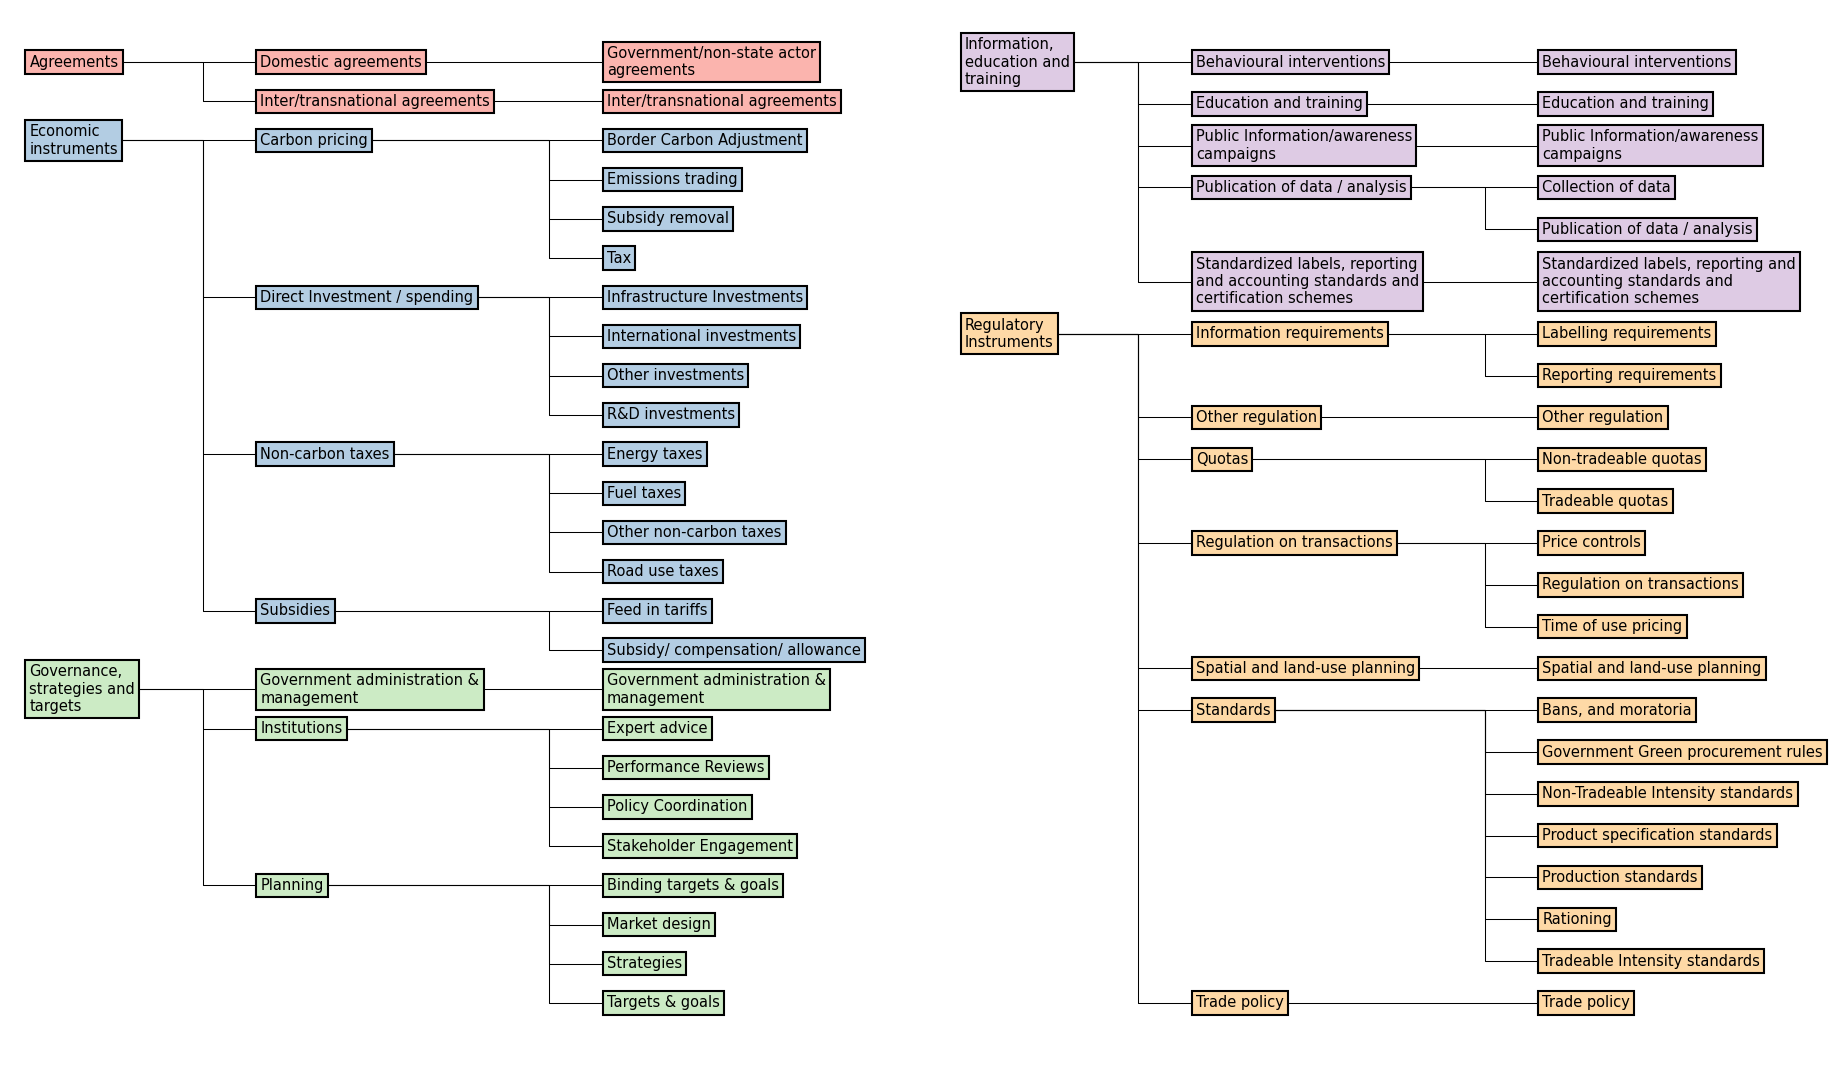

In [32]:
# import matplotlib.pyplot as plt
scaler = 0.8
fig, axs = plt.subplots(1,2, figsize=(16*scaler,9*scaler),dpi=150)
w = 5
h = 5
y = h
ha="left"
fs=7
va="center"
def twrap(t,line_length=45):
    return "\n".join(wrap(t,width=line_length))

alpha = 1

colors = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6']

nl1 = 0
nl2 = 0
nl3 = 0

ax = axs[0]

t_length = 20

for i,l in enumerate(treeData[0]['children']):
    if i > 2:
        ax.set_xlim(w*0.95,w*4)
        ax.invert_yaxis()
        ax.axis('off')
        ax = axs[1]
    for j,ll in enumerate(l['children']):
        for k,lll in enumerate(ll['children']):
            if len(lll['name'])>80:
                y+=h*0.25
            ax.text(w*3,y,twrap(lll['name'], 35),ha=ha, fontsize=fs, wrap=True,va=va, bbox={'facecolor': colors[i], 'alpha': alpha , 'pad': 2})
            nl3+=1
            if j==0 and k==0:
                ax.text(w*1,y,twrap(l['name'], 15),ha=ha, fontsize=fs, wrap=True,va=va, bbox={'facecolor': colors[i], 'alpha': alpha, 'pad': 2})
                nl1+=1
                y1 = y
            if k==0:
                ax.text(w*1.8,y,twrap(ll['name'], 30),ha=ha, fontsize=fs, wrap=True,va=va, bbox={'facecolor': colors[i], 'alpha': alpha, 'pad': 2})
                nl2+=1
                ax.plot([w*1,w*1.6,w*1.6,w*1.8],[y1,y1,y,y],color="black",lw=0.5)
                y2 = y
            ax.plot([w*1.8,w*2.8,w*2.8,w*3],[y2,y2,y,y],color="black",lw=0.5)
            if len(lll['name'])>80:
                y+=h*0.25
                
            y+=h
    

print(nl1, nl2, nl3)
    
ax.set_xlim(w*0.95,w*4)
#ax.set_ylim(0,y)

ax.invert_yaxis()
ax.invert_yaxis()



fig.tight_layout()
    
plt.savefig("figures/typology_wide.pdf",bbox_inches="tight")
plt.savefig("figures/typology_wide.png",bbox_inches="tight")
plt.savefig("figures/typology_wide.svg",bbox_inches="tight")

plt.show()

In [5]:

p.rating_first = True
p.save()
i1 = 1
i2 = 1
i3 = 1

instruments = []

l1s = set([])
l3s = set([])
l2s = set([])
for i, row in df.iterrows():
    
    if row['Level I'] is None or row['Level III'] is None:
        continue
    
    l1, created = Category.objects.get_or_create(
        project=p,
        level=4,
        parent_category=p1,
        name__iregex=f"^[^a-z]*{row['Level I']}"
    )
    if len(l1s | set([l1.id])) > len(l1s):
        l3s = set([])
    l1s = l1s | set([l1.id])
    l1.name = f"{len(l1s)}. {row['Level I']}"
    l1.description=row['Level I description']
    l1.save()
    
    print(row['Level II.i'])
    
    l2, created = Category.objects.get_or_create(
        project=p,
        level=5,
        parent_category=p2,
        name__iregex=f"^[^a-z]*{row['Level II.i']}"
    )
    l2s = l2s | set([l2])
    l2.name = f"{len(l1s)}.{len(l2s):02d}. {row['Level II.i']}"
    l2.description=row['Level II.i description']
    l2.equivalents.add(l1)
    l2.save()
    
    print(row['Level III'])
    
    l3, created = Category.objects.get_or_create(
        project=p,
        level=6,
        parent_category=p3,
        name__iregex=f"^[^a-z]*{row['Level III']}"
    )
    l3s = l3s | set([l3])
    l3.name = f"{len(l1s)}.{len(l3s):02d}. {row['Level III']}"
    l3.description=row['Definition']
    l3.equivalents.clear()
    #l3.equivalents.add(l1)
    if row['Level II.i']==row['Level III']:
        pass
    else:
        l3.equivalents.add(l2)
    l3.save()

Carbon pricing
Tax
Carbon pricing
Border Carbon Adjustment
Subsidies
Subsidy/ compensation/ allowance
Subsidies
Feed in tariffs
Carbon pricing
Emissions trading
Carbon pricing
Subsidy removal
Non-carbon taxes
Energy taxes
Non-carbon taxes
Fuel taxes
Non-carbon taxes
Road use taxes
Non-carbon taxes
Other non-carbon taxes
Direct Investment / spending
Infrastructure Investments
Direct Investment / spending
R&D investments
Direct Investment / spending
International investments
Direct Investment / spending
Other investments
Trade policy
Trade policy
Quotas
Tradeable quotas
Quotas
Non-tradeable quotas
Regulation on transactions
Regulation on transactions
Regulation on transactions
Time of use pricing
Regulation on transactions
Price controls
Information requirements
Reporting requirements
Information requirements
Labelling requirements
Spatial and land-use planning
Spatial and land-use planning
Other regulation
Other regulation
Standards
Tradeable Intensity standards
Standards
Non-Tradeable 

In [6]:
django.db.connection.close()
Category.objects.filter(project=p,level__in=[4,5,6,7,8]).update(selection_tiers=2)

94

In [9]:
spreadsheet_key = '15RN38inB4aGedpzFaDw2y0p4L9ecqvo_2AW4Oea4whw'
wb = gc.open_by_key(spreadsheet_key)
ws = wb.worksheet("Other columns")

table = ws.get_all_values()
df = pd.DataFrame(table[1:], columns=table[0])
df.head()

,Response type,Response type (description),Governance and policy,Governance and policy (description),Sector,Sector (description),Sector response,Policy level,Policy level description,Study type,Study type description
0,Mitigation,Mitigation refers to any human activity that h...,Not policy related,The document does not concern policies respond...,AFOLU,"Agriculture, Forestry, and Other Land Use",Mitigation,Supranational and international,Supranational and international,Ex-post,The study looks back at a policy that has alre...
1,Adaptation,Adaptation refers to any human activity design...,Analysis of a specific policy,The paper describes a specific enacted policy ...,Buildings,Buildings,Mitigation,National,National,Ex-ante,The study looks at the potential impacts of a ...
2,,,Analysis of a generic policy,The paper describes a general or theoretical p...,Industry,Industry,Mitigation,Sub-national / regional,"E.g. federal state, city",Ex-ante (IAM),The study provides evidence from Integrated As...
3,,,Broader governance and policy,The paper does not describe concrete policy in...,Energy,Energy,Mitigation,Local,"E.g. town, borough, district",Quantitative,The study provides quantitative evidence regar...
4,,,,,Transport,Transport,Mitigation,,,Qualitative,The study provides qualitative evidence regard...


In [5]:
clear = False
if clear:
    Category.objects.filter(project=p,level__gt=1).delete()

In [11]:
django.db.connection.close()
p = Project.objects.get(pk=260)
rt, created = Category.objects.get_or_create(
    project=p,
    name="Response type<hidden>",
    level=1
)
rt.show_equivalents = True
rt.save()
gp, created = Category.objects.get_or_create(
    project=p,
    name="Governance and policy<hidden>",
    level=1
)
sc, created = Category.objects.get_or_create(
    project=p,
    name="Sector<hidden>",
    level=1
)
sc.filtered_equivalents = True
sc.save()

pl, created = Category.objects.get_or_create(
    project=p,
    name="Policy scope<hidden>",
    level=1
)

st, created = Category.objects.get_or_create(
    project=p,
    name="Study type<hidden>",
    level=1
)

for i,row in df.iterrows():
    if row['Response type'] is not None and row['Response type']!="":
        rl, created = Category.objects.get_or_create(
            project=p,
            level=2,
            parent_category=rt,
            name__iregex=f"^[^a-z]*{row['Response type']}"        
        )
        rl.name = f"{i}. {row['Response type']}"
        rl.description=row['Response type (description)']
        rl.save()
        
    if row['Governance and policy'] is not None and row['Governance and policy']!="":
        rl, created = Category.objects.get_or_create(
            project=p,
            level=3,
            parent_category=gp,
            name__iregex=f"^[^a-z]*{row['Governance and policy']}"        
        )
        rl.name = f"{i}. {row['Governance and policy']}"
        rl.description=row['Governance and policy (description)']
        rl.save()
        
    if row['Policy level'] is not None and row['Policy level']!="":
        rl, created = Category.objects.get_or_create(
            project=p,
            level=7,
            parent_category=pl,
            name__iregex=f"^[^a-z]*{row['Policy level']}"        
        )
        rl.name = f"{i}. {row['Policy level']}"
        rl.description=row['Policy level description']
        rl.save()
        
    if row['Study type'] is not None and row['Study type description']!="":
        rl, created = Category.objects.get_or_create(
            project=p,
            level=9,
            parent_category=st,
            name__iregex=f"^[^a-z]*{row['Study type']}$".replace(')','\)').replace('(','\(')        
        )
        rl.name = f"{i}. {row['Study type']}"
        rl.description=row['Study type description']
        rl.save()
        
    if row['Sector'] is not None and row['Sector']!="":
        rl, created = Category.objects.get_or_create(
            project=p,
            level=8,
            parent_category=sc,
            name__iregex=f"^[^a-z]*{row['Sector']}"        
        )
        if row['Sector response']=="Mitigation":
            rl.equivalents.add(Category.objects.get(project=p,level=2,name__icontains="mitigation"))
        elif row['Sector response']=="Adaptation":
            rl.equivalents.add(Category.objects.get(project=p,level=2,name__icontains="adaptation"))
        rl.name = f"{i+1:02d}. {row['Sector']}"
        rl.description=row['Sector (description)']
        rl.save()
    
    


In [6]:
policies = " OR ".join(Category.objects.filter(project=p, level=6).values_list('name',flat=True)) + " climat* "
q = Query.objects.get(pk=8843)
q.text = policies
q.save()

In [5]:
c1, created = Category.objects.get_or_create(
    project=p,
    level=1,
    name="Enter the country or countries mentioned in this study (if London, enter UK)<hidden><wholetext>"
)
ct, created = Category.objects.get_or_create(
    project=p,
    level=9,
    name="countries",
    country_select=True,
    parent_category=c1
)

In [4]:
y1, created = Category.objects.get_or_create(
    project=p,
    level=1,
    name="Enter the year the policy was implemented (if this is given in the title or abstract)<hidden><wholetext>"
)
y1.name = "Enter the name of the policy (if a specific policy is mentioned)<hidden><wholetext>"
y1.save()
yt, created = Category.objects.get_or_create(
    project=p,
    level=11,
    name="policy name",
    text_free=True,
    parent_category=y1
)
